In [1]:
import numpy as np
import pandas as pd
import pandas
import xgboost
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/2022-neww/2022_new.csv
/kaggle/input/2019-new/2019_new.csv
/kaggle/input/2021-new/2021_new.csv


**Importing the 2022 dataset**

In [2]:
df1 = pd.read_csv('/kaggle/input/2022-neww/2022_new.csv')
r1 = df1[["Cooling Load 2022 (kW)","IT Load 2022 (kW)","WBT (C)","Temp (C)","Humidity"]]
r2 = df1["PUE (2022)"]
df1

,Date,Chiller Energy 2022 (kWh),PAC Energy 2022 (kWh),Cooling Energy 2022 (kWh),Chiller Load 2022 (kW),PAC Load 2022 (kW),Cooling Load 2022 (kW),IT Load 2022 (kW),WBT (C),Temp (C),Humidity,PUE (2022)
0,03-11-2021,1833516,1152446,2985962,56.82,48.90,105.72,281.74,18.06,23.32,63.15,1.44
1,03-12-2021,1834836,1153619,2988455,58.09,50.71,108.80,287.77,18.20,23.83,61.11,1.44
2,3-13-2021,1836199,1154791,2990990,58.23,48.82,107.05,285.26,19.95,24.98,64.85,1.45
3,3-14-2021,1837605,1155953,2993558,75.23,48.42,123.65,279.38,20.96,25.79,67.13,1.47
4,3-15-2021,1838903,1157109,2996012,46.63,48.85,95.48,278.43,21.58,27.14,64.39,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...
203,10-22-2021,78286,421091,499377,40.23,60.55,100.78,311.29,19.04,24.14,64.50,1.49
204,10-23-2021,79242,422520,501762,40.42,59.32,99.74,306.06,17.99,22.61,66.52,1.50
205,10-24-2021,80193,423888,504081,42.49,56.96,99.45,297.45,18.20,22.88,65.83,1.50
206,10-30-2021,85962,432106,518068,48.87,60.29,109.16,299.67,18.00,21.84,71.07,1.53


**Importing the 2021 dataset**

In [3]:
df2 = pd.read_csv('/kaggle/input/2021-new/2021_new.csv')
df2

,Date,Chiller Energy 2021 (kWh),PAC Energy 2021 (kWh),Cooling Energy 2021 (kWh),Chiller Load 2021 (kW),PAC Load 2021 (kW),Cooling Load 2021 (kW),IT Load 2021 (kW),WBT (C),Temp (C),Humidity,PUE (2021)
0,3-11-2021,965585,1773672,"27,39,257.00",54.70,46.44,101.14,306.00,22.39,29.43,57.09,1.43
1,3-12-2021,1515036,1774711,"32,89,747.00",53.81,48.02,101.83,301.45,20.00,27.09,53.83,1.42
2,3-13-2021,1516295,1775721,"32,92,016.00",52.24,46.35,98.59,296.56,20.20,27.00,56.09,1.42
3,3-14-2021,1517670,1776756,"32,94,426.00",56.28,46.65,102.93,301.68,19.55,26.23,56.56,1.42
4,3-15-2021,1518924,1777812,"32,96,736.00",53.18,56.86,110.04,298.34,20.50,27.09,57.27,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...
216,10-24-2021,1766724,1008168,"27,74,892.00",41.24,63.11,104.35,269.46,20.96,24.90,72.17,1.41
217,10-28-2021,1770835,1011633,"27,82,468.00",44.65,36.93,81.58,297.36,18.80,23.30,67.36,1.35
218,10-29-2021,1771829,1012478,"27,84,307.00",45.71,36.34,82.05,295.35,19.22,23.42,69.05,1.35
219,10-30-2021,1772876,1013323,"27,86,199.00",45.29,37.09,82.38,293.98,18.20,23.45,62.85,1.34


**Importing the 2019 dataset**

In [4]:
df3 = pd.read_csv('/kaggle/input/2019-new/2019_new.csv')
df3

,Date,Chiller Energy 2019 (kWh),PAC Energy 2019 (kWh),Cooling Energy 2019 (kWh),Chiller Load 2019 (kW),PAC Load 2019 (kW),Cooling Load 2019 (kW),IT Load 2019 (kW),WBT (C),Temp (C),Humidity,PUE (2019)
0,3-11-2021,893031,1017268,"19,10,299.00",16.67,32.91,49.58,190.94,16.85417,22.13333,60.87083,1.36
1,3-12-2021,893417,1017936,"19,11,353.00",17.01,40.86,57.87,188.53,16.68750,22.28750,59.48750,1.38
2,3-13-2021,893688,1018497,"19,12,185.00",12.78,24.11,36.89,187.79,15.48333,20.58750,61.01250,1.34
3,3-14-2021,893938,1019104,"19,13,042.00",11.35,25.13,36.48,203.11,14.90417,19.44583,64.17917,1.33
4,3-15-2021,894228,1019753,"19,13,981.00",12.41,28.01,40.42,201.41,15.45000,20.41667,62.30833,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...
216,10-24-2021,1087109,1230695,"23,17,804.00",60.47,44.27,104.74,284.84,20.27083,25.30833,64.73333,1.43
217,10-28-2021,1092800,1234695,"23,27,495.00",60.94,42.08,103.02,275.45,19.74583,24.81667,64.28750,1.44
218,10-29-2021,1094390,1235605,"23,29,995.00",66.20,68.03,134.23,280.27,19.70833,24.03750,68.36250,1.44
219,10-30-2021,1095826,1236572,"23,32,398.00",60.01,42.14,102.15,280.30,20.27500,25.01250,66.60417,1.47


# Multi Regression Model for 2022 dataset
* X variables : Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

In [5]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(r1,r2,test_size=0.1)

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression(normalize=True)
lm1 = lm1.fit(X_train1,y_train1)
y_pred1 = lm1.predict(X_test1)
print (lm1.coef_)
print ("Training score : "+str(lm1.score(X_train1, y_train1)*100) + "%")
print ("Test r2 score : "+str(r2_score(y_test1,y_pred1)))

[ 0.00114775 -0.00085137  0.00609306 -0.00675482 -0.00039408]
Training score : 20.16084236485178%
Test r2 score : 0.17966729053207597


# Random Forest Model for 2022 dataset
* X variables : Chiller Load, PAC Load, Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

In [6]:
r1_ = df1[["Chiller Load 2022 (kW)","PAC Load 2022 (kW)","Cooling Load 2022 (kW)","IT Load 2022 (kW)","WBT (C)","Temp (C)","Humidity"]]
r2_ = df1["PUE (2022)"]

from sklearn.model_selection import train_test_split
X_train1_, X_test1_, y_train1_, y_test1_ = train_test_split(r1_,r2_,test_size=0.1)

from sklearn.ensemble import RandomForestRegressor as rf
regressor1 = rf(n_estimators = 100, random_state = 9)
regressor1.fit(X_train1_, y_train1_)
y_pred1_ = regressor1.predict(X_test1_)
print ("Training score : "+str(regressor1.score(X_train1_, y_train1_)*100) + "%")
print ("Test r2 score : "+str(r2_score(y_test1_,y_pred1_)))

Training score : 88.1773874765641%
Test r2 score : 0.2807338212635183


# Non Linear Model (using xgboost) for 2022 dataset
* X variables : Chiller Load 2022 (kW), PAC Load 2022 (kW), Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

Mean squared error: 0.002402797269707471
R2 score: 0.06656659977008872


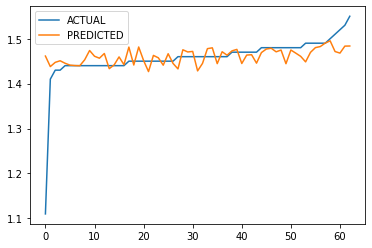

In [7]:
from sklearn.model_selection import train_test_split
X_train1__, X_test1__, y_train1__, y_test1__ = train_test_split(r1_,r2_,test_size=0.3)

estimator = xgboost.XGBRegressor(objective="reg:squaredlogerror")
estimator.fit(X_train1__, y_train1__)
predictions = estimator.predict(X_test1__)
df_ = pandas.DataFrame({"ACTUAL": y_test1__, "PREDICTED": predictions})
df_.sort_values("ACTUAL").reset_index()[["ACTUAL", "PREDICTED"]].plot()
print(f"Mean squared error: {mean_squared_error(y_test1__.values, predictions)}")
print(f"R2 score: {r2_score(y_test1__.values, predictions)}")

# Multi Reg Model for 2021 dataset
* X variables : Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

In [8]:
r3 = df2[["Cooling Load 2021 (kW)","IT Load 2021 (kW)","WBT (C)","Temp (C)","Humidity"]]
r4 = df2["PUE (2021)"]
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(r3,r4,test_size=0.1)
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression(normalize=True)
lm2 = lm2.fit(X_train2,y_train2)
y_pred2 = lm2.predict(X_test2)
print (lm2.coef_)
print ("Training score : "+str(lm2.score(X_train2, y_train2)*100) + "%")
print ("Test r2 score : "+str(r2_score(y_test2,y_pred2)))

[ 0.00068027 -0.00109428  0.01673229 -0.00928101 -0.00275455]
Training score : 64.48412178669778%
Test r2 score : 0.10651974170384826


# Random Forest Model for 2021 dataset
* X variables : Chiller Load, PAC Load, Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

In [9]:
r3_ = df2[["Chiller Load 2021 (kW)","PAC Load 2021 (kW)","Cooling Load 2021 (kW)","IT Load 2021 (kW)","WBT (C)","Temp (C)","Humidity"]]
r4_ = df2["PUE (2021)"]
from sklearn.model_selection import train_test_split
X_train2_, X_test2_, y_train2_, y_test2_ = train_test_split(r3_,r4_,test_size=0.1)
from sklearn.ensemble import RandomForestRegressor as rf
regressor2 = rf(n_estimators = 100, random_state = 9)
regressor2.fit(X_train2_, y_train2_)
y_pred2_ = regressor2.predict(X_test2_)
print ("Training score : "+str(regressor2.score(X_train2_, y_train2_)*100) + "%")
print ("Test r2 score : "+str(r2_score(y_test2_,y_pred2_)))

Training score : 85.72071969403852%
Test r2 score : 0.206387181164158


# Non Linear Model (using xgboost) for 2021 dataset
* X variables : Chiller Load, PAC Load, Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

Mean squared error: 0.00037278564859473666
R2 score: 0.3551222756487401


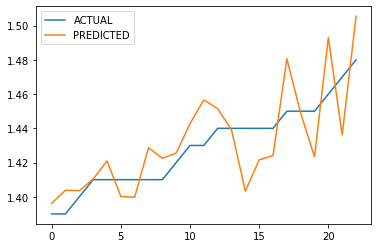

In [10]:
estimator2 = xgboost.XGBRegressor(objective="reg:squaredlogerror")
estimator2.fit(X_train2_, y_train2_)
predictions2 = estimator2.predict(X_test2_)
df__ = pandas.DataFrame({"ACTUAL": y_test2_, "PREDICTED": predictions2})
# Show the actual vs predicted
df__.sort_values("ACTUAL").reset_index()[["ACTUAL", "PREDICTED"]].plot()
print(f"Mean squared error: {mean_squared_error(y_test2_.values, predictions2)}")
print(f"R2 score: {r2_score(y_test2_.values, predictions2)}")

# Multi Reg Model for 2019 dataset
* X variables : Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

In [11]:
r5 = df3[["Cooling Load 2019 (kW)","IT Load 2019 (kW)","WBT (C)","Temp (C)","Humidity"]]
r6 = df3["PUE (2019)"]
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(r5,r6,test_size=0.1)
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression(normalize=True)
lm3 = lm3.fit(X_train3,y_train3)
y_pred3 = lm3.predict(X_test3)
print (lm3.coef_)
print ("Training score : "+str(lm3.score(X_train3, y_train3)*100) + "%")
print ("Test r2 score : "+str(r2_score(y_test3,y_pred3)))

[ 0.00241697 -0.00356273 -0.02034223  0.02565063  0.01161599]
Training score : 82.02118577586955%
Test r2 score : 0.8581648627294914


# Random Forest Model for 2019 dataset
* X variables : Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

In [12]:
r5 = df3[["Cooling Load 2019 (kW)","IT Load 2019 (kW)","WBT (C)","Temp (C)","Humidity"]]
r6 = df3["PUE (2019)"]
from sklearn.model_selection import train_test_split
X_train3_, X_test3_, y_train3_, y_test3_ = train_test_split(r5,r6,test_size=0.1)
from sklearn.ensemble import RandomForestRegressor as rf
regressor3 = rf(n_estimators = 100, random_state = 9)
regressor3.fit(X_train3_, y_train3_)
y_pred3_ = regressor3.predict(X_test3_)
print ("Training score : "+str(regressor3.score(X_train3_, y_train3_)*100) + "%")
print ("Test r2 score : "+str(r2_score(y_test3_,y_pred3_)))

Training score : 99.24127173890952%
Test r2 score : 0.7557544957502857


# Non Linear Model (using xgboost) for 2019 dataset
* X variables : Chiller Load, PAC Load, Cooling Load, IT Load, WBT, Temp, Humidity
* y variable : PUE

Mean squared error: 0.027126813045696755
R2 score: 0.6901580055107595


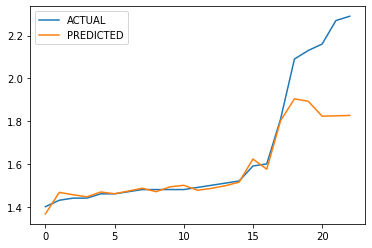

In [13]:
r7 = df3[["Chiller Load 2019 (kW)","PAC Load 2019 (kW)","Cooling Load 2019 (kW)","IT Load 2019 (kW)","WBT (C)","Temp (C)","Humidity"]]
r8 = df3["PUE (2019)"]
X_train, X_test, y_train, y_test = train_test_split(r7,r8,test_size=0.1)
estimator = xgboost.XGBRegressor(objective="reg:squaredlogerror")
estimator.fit(X_train, y_train)
predictions = estimator.predict(X_test)
df = pandas.DataFrame({"ACTUAL": y_test, "PREDICTED": predictions})
df.sort_values("ACTUAL").reset_index()[["ACTUAL", "PREDICTED"]].plot()
print(f"Mean squared error: {mean_squared_error(y_test.values, predictions)}")
print(f"R2 score: {r2_score(y_test.values, predictions)}")